# **Demonstração de Transformações Lineares: Rotação e Cisalhamento**

Este notebook demonstra o passo a passo da construção e aplicação de duas transformações lineares 2D:

1.  **Rotação horária de 90°:** Gira o plano em 90 graus no sentido do horário.
2.  **Cisalhamento (Shear) em x:** "Inclina" o plano na direção do eixo x.

O foco é mostrar como as matrizes que representam essas transformações são derivadas a partir da transformação dos vetores da base canônica ($\vec{i}$ e $\vec{j}$) e, em seguida, aplicar essas matrizes a vetores arbitrários.

In [16]:
#configuração
import numpy as np
import matplotlib.pyplot as plt

#estilo de gráfico bonitinho
plt.style.use('seaborn-v0_8-whitegrid')

def plot_vectors(vectors, colors, labels, ax, title="Visualização de Vetores"):
    #função auxiliar para plotar uma lista de vetores 2D.

    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True)
    
    for i, vec in enumerate(vectors):
        #vai plotar cada vetor partindo da origem (0,0)
        ax.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color=colors[i], label=labels[i])
        
    ax.set_title(title)
    ax.legend()

# Definição dos vetores da base canônica i e j
i_hat = np.array([1, 0])
j_hat = np.array([0, 1])

## **Parte 1: Rotação Horária de 90°**

### Obtendo a Matriz de Transformação

Uma transformação linear é completamente definida pelo efeito que ela causa nos vetores da sua base. No plano 2D, a base canônica é formada por $\vec{i} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ e $\vec{j} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$.

Para obter a matriz de rotação horária de 90°, observamos para onde esses vetores vão:

1.  **Vetor $\vec{i}$:** Ao ser rotacionado 90° no sentido horário, o vetor $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ (que aponta para a direita) passa a apontar para baixo, tornando-se o vetor $\begin{pmatrix} 0 \\ -1 \end{pmatrix}$.
2.  **Vetor $\vec{j}$:** Ao ser rotacionado 90° no sentido horário, o vetor $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$ (que aponta para cima) passa a apontar para a direita, tornando-se o vetor $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$.

A matriz de transformação é formada colocando as coordenadas desses novos vetores como suas colunas:

$$
M_{rot} = \begin{pmatrix} \text{novo } \vec{i} & \text{novo } \vec{j} \end{pmatrix} = \begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix}
$$


Vetor i original: [1 0]
Vetor i rotacionado: [ 0 -1]

Vetor j original: [0 1]
Vetor j rotacionado: [1 0]

Matriz de Rotação Horária de 90° (M_rot):
 [[ 0  1]
 [-1  0]]


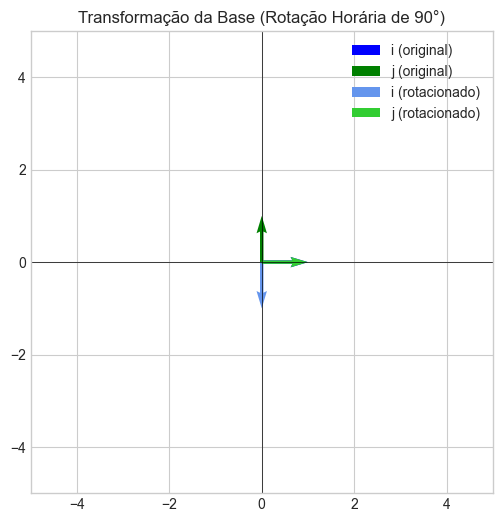

In [17]:
#obtenção numérica da matriz de rotação
#vetores da base após a rotação
i_hat_rot = np.array([0, -1])
j_hat_rot = np.array([1, 0])

#a matriz é formada pelas colunas dos vetores transformados
#em numPy, criamos uma lista de colunas e transpô-la com .T
M_rot = np.array([i_hat_rot, j_hat_rot]).T

print("Vetor i original:", i_hat)
print("Vetor i rotacionado:", i_hat_rot)
print("\nVetor j original:", j_hat)
print("Vetor j rotacionado:", j_hat_rot)
print("\nMatriz de Rotação Horária de 90° (M_rot):\n", M_rot)


#visualização gráfica da transformação da base
fig, ax = plt.subplots(figsize=(6, 6))
plot_vectors(
    vectors=[i_hat, j_hat, i_hat_rot, j_hat_rot],
    colors=['blue', 'green', 'cornflowerblue', 'limegreen'],
    labels=['i (original)', 'j (original)', 'i (rotacionado)', 'j (rotacionado)'],
    ax=ax,
    title="Transformação da Base (Rotação Horária de 90°)"
)
plt.show()

## **Parte 2: Cisalhamento (Shear) em x**

### Obtendo a Matriz de Transformação

O cisalhamento em x mantém a coordenada `y` de todos os vetores, mas desloca a coordenada `x` por um valor proporcional à coordenada `y`. A regra é $(x, y) \rightarrow (x + k \cdot y, y)$, onde `k` é o fator de cisalhamento. Vamos usar $k=1.5$.

1.  **Vetor $\vec{i}$:** O vetor $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ tem $y=0$, então sua transformação é $(1 + 1.5 \cdot 0, 0) = (1, 0)$. O vetor $\vec{i}$ não muda.
2.  **Vetor $\vec{j}$:** O vetor $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$ tem $y=1$, então sua transformação é $(0 + 1.5 \cdot 1, 1) = (1.5, 1)$. O vetor $\vec{j}$ é "inclinado".

A matriz de cisalhamento é:

$$
M_{shear} = \begin{pmatrix} \text{novo } \vec{i} & \text{novo } \vec{j} \end{pmatrix} = \begin{pmatrix} 1 & 1.5 \\ 0 & 1 \end{pmatrix}
$$

Fator de cisalhamento (k): 1.5

Vetor i original: [1 0]
Vetor i cisalhado: [1 0]

Vetor j original: [0 1]
Vetor j cisalhado: [1.5 1. ]

Matriz de Cisalhamento em x (k=1.5) (M_shear):
 [[1.  1.5]
 [0.  1. ]]


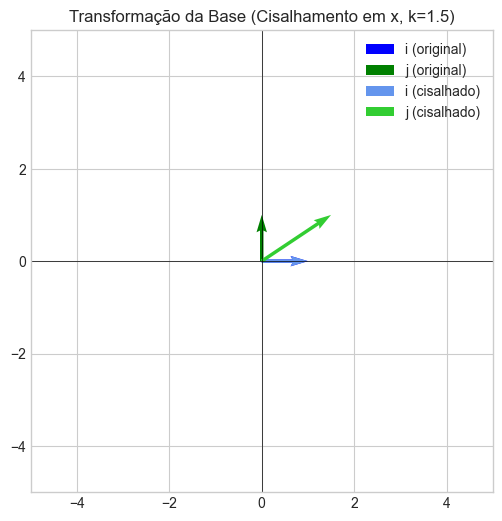

In [18]:
#obtenção numérica da matriz de cisalhamento
k = 1.5

#vetores da base após o cisalhamento
i_hat_shear = np.array([1, 0])
j_hat_shear = np.array([k, 1]) # (0 + k*1, 1)

#a matriz é formada pelas colunas dos vetores transformados
M_shear = np.array([i_hat_shear, j_hat_shear]).T

print("Fator de cisalhamento (k):", k)
print("\nVetor i original:", i_hat)
print("Vetor i cisalhado:", i_hat_shear)
print("\nVetor j original:", j_hat)
print("Vetor j cisalhado:", j_hat_shear)
print(f"\nMatriz de Cisalhamento em x (k={k}) (M_shear):\n", M_shear)

#visualização gráfica da transformação da base
fig, ax = plt.subplots(figsize=(6, 6))
plot_vectors(
    vectors=[i_hat, j_hat, i_hat_shear, j_hat_shear],
    colors=['blue', 'green', 'cornflowerblue', 'limegreen'],
    labels=['i (original)', 'j (original)', 'i (cisalhado)', 'j (cisalhado)'],
    ax=ax,
    title=f"Transformação da Base (Cisalhamento em x, k={k})"
)
plt.show()

## **Parte 3: Aplicação das Matrizes a Vetores Arbitrários**

Agora, vamos aplicar as matrizes `M_rot` e `M_shear` a dois vetores arbitrários para ver o resultado. A transformação de um vetor $\vec{v}$ é calculada pela multiplicação da matriz pelo vetor: $\vec{v'} = M \cdot \vec{v}$.

Vamos usar os vetores:
- $\vec{v_1} = \begin{pmatrix} 2 \\ 1 \end{pmatrix}$
- $\vec{v_2} = \begin{pmatrix} -1 \\ 2 \end{pmatrix}$

--- APLICAÇÃO DA ROTAÇÃO ---
Vetor v1 original: [2 1]  ->  Rotacionado: [ 1 -2]
Vetor v2 original: [-1  2] ->  Rotacionado: [2 1]


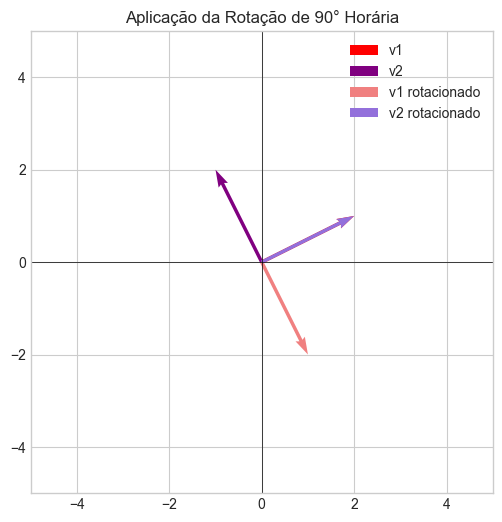


--- APLICAÇÃO DO CISALHAMENTO ---
Vetor v1 original: [2 1]  ->  Cisalhado: [3.5 1. ]
Vetor v2 original: [-1  2] ->  Cisalhado: [2. 2.]


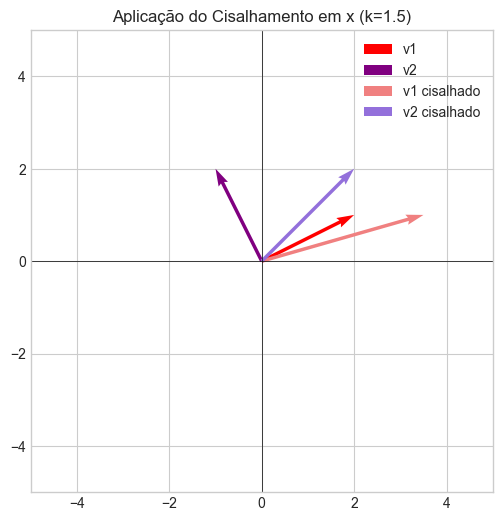

In [19]:
#definição dos vetores arbitrários
v1 = np.array([2, 1])
v2 = np.array([-1, 2])

#aqui acontece a aplicação da rotação
v1_rot = M_rot @ v1  # Usando o operador @ para multiplicação de matrizes
v2_rot = M_rot @ v2

print("--- APLICAÇÃO DA ROTAÇÃO ---")
print(f"Vetor v1 original: {v1}  ->  Rotacionado: {v1_rot}")
print(f"Vetor v2 original: {v2} ->  Rotacionado: {v2_rot}")

# Gráfico da Rotação
fig, ax = plt.subplots(figsize=(6, 6))
plot_vectors(
    vectors=[v1, v2, v1_rot, v2_rot],
    colors=['red', 'purple', 'lightcoral', 'mediumpurple'],
    labels=['v1', 'v2', 'v1 rotacionado', 'v2 rotacionado'],
    ax=ax,
    title="Aplicação da Rotação de 90° Horária"
)
plt.show()


#aqui ocorre a aplicação do cisalhamento
v1_shear = M_shear @ v1
v2_shear = M_shear @ v2

print("\n--- APLICAÇÃO DO CISALHAMENTO ---")
print(f"Vetor v1 original: {v1}  ->  Cisalhado: {v1_shear}")
print(f"Vetor v2 original: {v2} ->  Cisalhado: {v2_shear}")

#gráfico do cisalhamento
fig, ax = plt.subplots(figsize=(6, 6))
plot_vectors(
    vectors=[v1, v2, v1_shear, v2_shear],
    colors=['red', 'purple', 'lightcoral', 'mediumpurple'],
    labels=['v1', 'v2', 'v1 cisalhado', 'v2 cisalhado'],
    ax=ax,
    title=f"Aplicação do Cisalhamento em x (k={k})"
)
plt.show()